In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set(style="whitegrid",
        rc={
            "text.color": "black",
            "axes.labelcolor": "black",
            "axes.edgecolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "axes.facecolor": "#FFFFFF",
            "figure.facecolor": "#F5F8FA"}
        )

In [2]:
df=pd.read_pickle("final_df.pkl").reset_index(drop=True)

In [3]:
df[["tweet","usuario","dispositivo"]].describe()

,tweet,usuario,dispositivo
count,34559,34559,34557
unique,31247,9409,79
top,desde lanzamos un mensaje fuerte y claro tu al...,Vampiroperver,Twitter for Android
freq,80,332,11974


In [4]:
round(df["hashtags"].apply(len).mean(),0)

3.0

In [5]:
round(df["users"].apply(len).mean(),0)

1.0

In [6]:
df["dispositivo"].value_counts()[:10]

Twitter for Android           11974
Twitter Web App                9277
Twitter for iPhone             7650
TweetDeck                      2046
Hootsuite Inc.                  998
Twitter for iPad                678
WordPress.com                   300
directoalcorreo                 194
Salesforce - Social Studio      174
Buffer                          158
Name: dispositivo, dtype: int64

In [7]:
hashtags=[]
for i in df["hashtags"]:
    for j in i:
        hashtags.append(j)


In [8]:
join_hash=(",").join(hashtags).lower()

In [9]:
reg_amlo=re.compile(r"#amlo,")
clean_hash=reg_amlo.sub("",join_hash).split(",")

In [10]:
clean_hash.pop(67417)

'#amlo'

In [11]:
hashtag_series=pd.Series(clean_hash)

In [12]:
hashtag_series.nunique()

9067

In [13]:
top_hash=hashtag_series.value_counts().head(30)

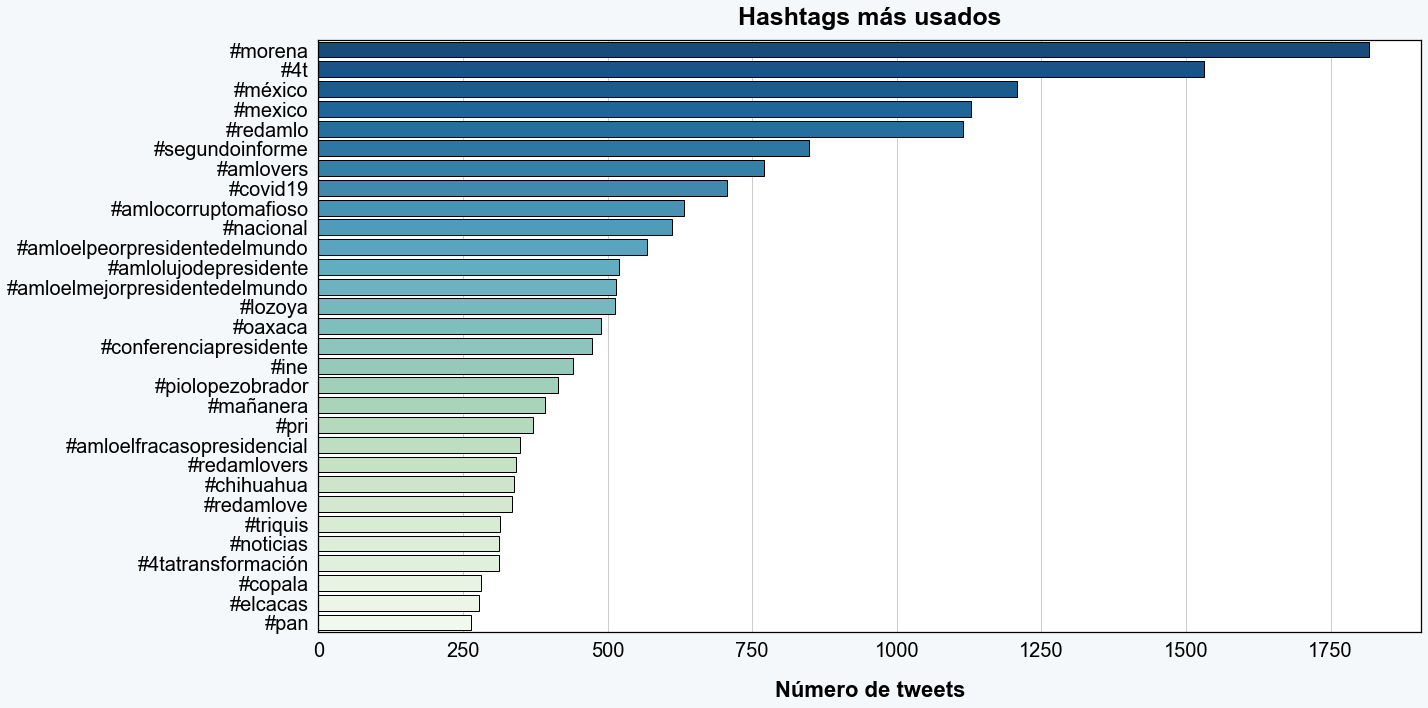

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x=top_hash.values, y=top_hash.index, palette="GnBu_r",lw=1,edgecolor="black")
plt.yticks(size=20,weight="light")
plt.xticks(size=20,weight="light")
plt.xlabel("Número de tweets",size=22,labelpad=20,weight="bold")
plt.title("Hashtags más usados",weight="bold",pad=15,size=25)
plt.tight_layout()

In [15]:
mentions=[]
for i in df["users"]:
    for j in i:
        mentions.append(j)

In [16]:
mentions_series=pd.Series(mentions)

In [17]:
mentions_series.nunique()

7683

In [18]:
top_mentions=mentions_series.value_counts().head(30)

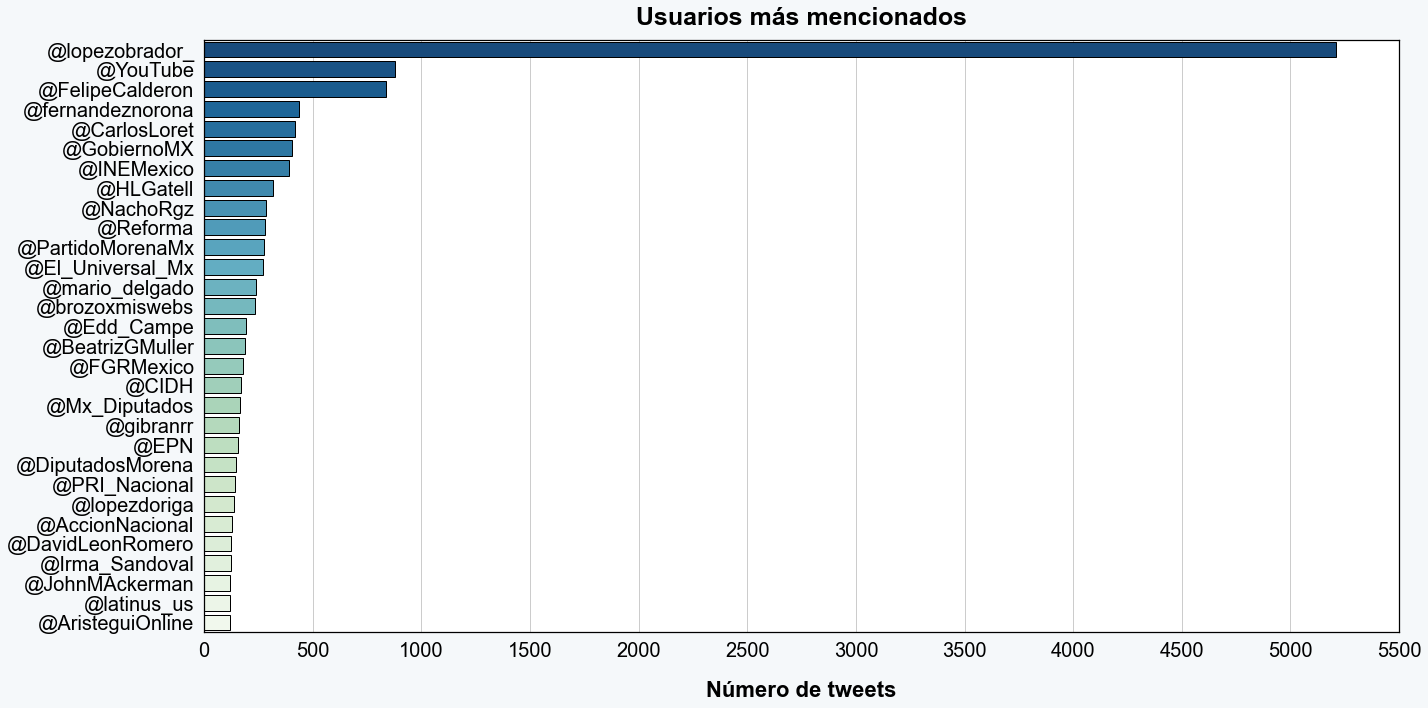

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=top_mentions.values, y=top_mentions.index, palette="GnBu_r",lw=1,edgecolor="black")
plt.yticks(size=20,weight="light")
plt.xticks(ticks=np.arange(0,6000,500),size=20,weight="light")
plt.xlabel("Número de tweets",size=22,labelpad=20,weight="bold")
plt.title("Usuarios más mencionados",weight="bold",pad=15,size=25)
plt.tight_layout()

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words('spanish')

In [21]:
def quitar_acentos(texto):
    juntar=(" ").join(texto)
    juntar=juntar.replace("á","a")
    juntar=juntar.replace("é","e")
    juntar=juntar.replace("í","i")
    juntar=juntar.replace("ó","o")
    juntar=juntar.replace("ú","u")
    lista_final=juntar.split()
    return lista_final
    

In [22]:
stop=quitar_acentos(stop)

In [23]:
def texto_a_palabras(texto):
    return [palabra for palabra in texto.split() if palabra not in stop]

In [24]:
df["tokens"]=df["tweet"].apply(texto_a_palabras)

In [25]:
conteo={}
for i in df["tokens"]:
    for palabra in i:
        if palabra in conteo:
            conteo[palabra] += 1
        else:
            conteo[palabra] = 1

In [26]:
conteo_palabras=pd.Series(conteo)

In [27]:
conteo_palabras.sort_values(ascending=False).head(30)

presidente    4818
mexico        2552
gobierno      2520
solo          1680
amlo          1680
asi           1502
video         1400
corrupcion    1356
pueblo        1347
dice          1307
lopez         1306
ahora         1278
hoy           1260
pais          1251
dinero        1222
ser           1218
obrador       1120
va            1071
hermano       1013
millones       964
años           961
mejor          944
bien           903
dijo           881
informe        880
hace           821
mexicanos      766
traves         760
ver            752
mil            750
dtype: int64

In [28]:
lista_tokens=[]
for i in df["tokens"]:
    for palabra in i:
        lista_tokens.append(palabra)

In [29]:
palabras=(" ").join(lista_tokens)

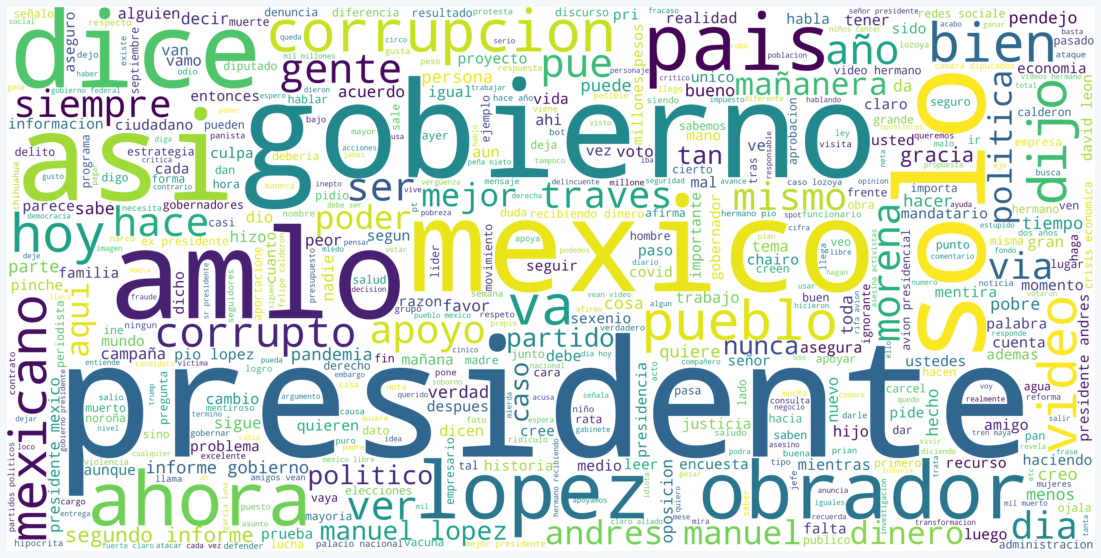

In [30]:
wordcloud = WordCloud(height=2500,width=5000,background_color="white",max_words=500).generate(palabras)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
with open("positive_words_es.txt", "r", encoding="utf-8") as f:
    palabras_positivas = f.read().splitlines()

with open("negative_words_es.txt", "r", encoding="utf-8") as f:
    palabras_negativas = f.read().splitlines()
    
with open("groserías.txt", "r", encoding="utf-8") as f:
    groserias = f.read().splitlines() 

In [32]:
palabras_positivas=quitar_acentos(palabras_positivas)
palabras_negativas=quitar_acentos(palabras_negativas)

In [33]:
len(palabras_positivas)

1555

In [34]:
len(palabras_negativas)

2720

In [35]:
len(groserias)

53

In [36]:
conteo_palabras.count()

33741

In [37]:
mes_contador=df.groupby(["mes","dia"])["tweet"].count()

In [38]:
mes_contador.mean()

1114.8064516129032

In [39]:
hora_contador=df.groupby("hora")["tweet"].count()

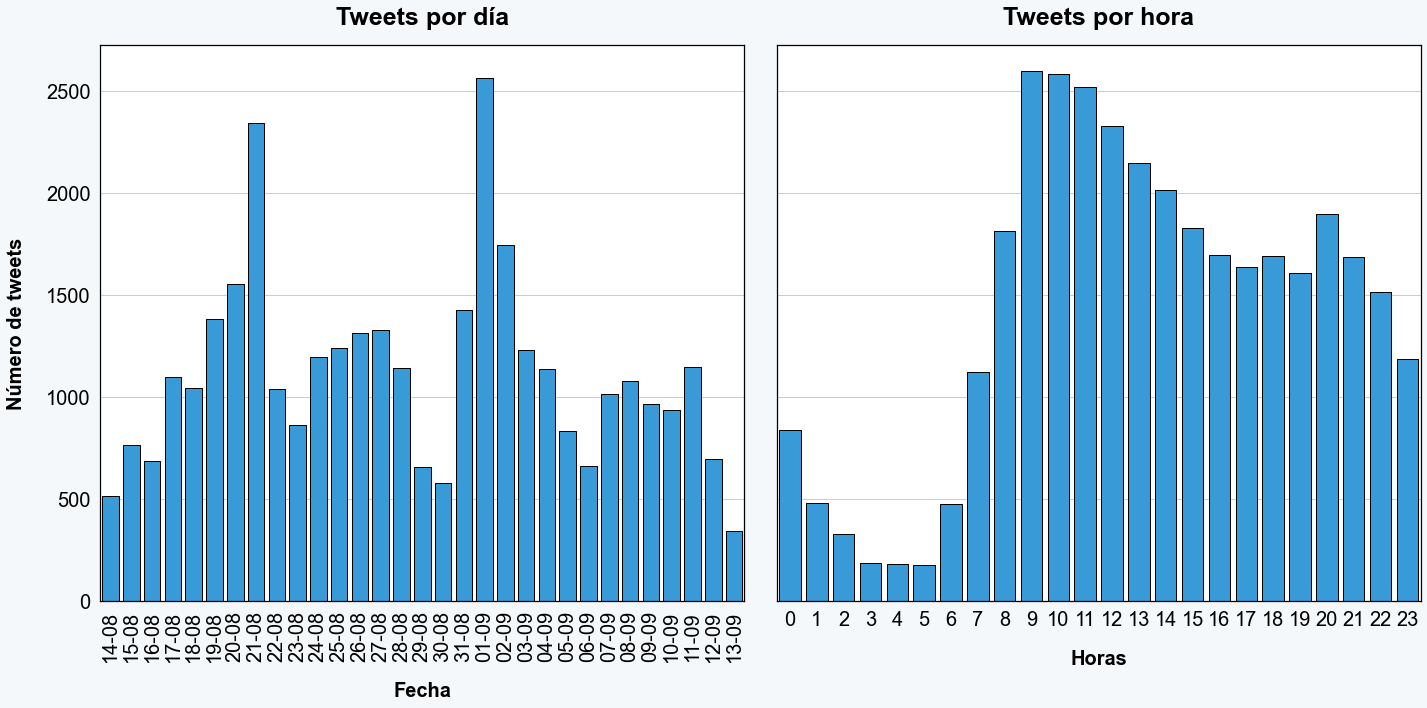

In [40]:
figure=plt.figure(figsize=(20,10))
ax1= figure.add_subplot(1,2,1)
ax2=figure.add_subplot(1,2,2,sharey = ax1)
sns.barplot(x=df["fecha_str"].unique(),color="#1DA1F2",y=mes_contador.values,lw=1,edgecolor="black",orient="v",ax=ax1)
ax1.tick_params(axis="x", labelsize=20,labelrotation=90)
ax1.tick_params(axis="y", labelsize=20)
ax1.set_title("Tweets por día",fontsize=25,fontweight="bold",pad=20)
ax1.set_xlabel("Fecha",fontsize=20,fontweight="bold",labelpad=20)
ax1.set_ylabel("Número de tweets",fontsize=20,fontweight="bold",labelpad=20)
sns.barplot(x=hora_contador.index,color="#1DA1F2",y=hora_contador.values,lw=1,edgecolor="black",orient="v",ax=ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.set_title("Tweets por hora",fontsize=25,fontweight="bold",pad=20)
ax2.set_xlabel("Horas",fontsize=20,fontweight="bold",labelpad=20)
figure.tight_layout()
plt.subplots_adjust(wspace = 0.05)


In [41]:
def puntaje(texto):
    score=0
    for i in texto:
        if i in palabras_positivas:
            score+=1
        elif i in palabras_negativas:
            score-=1
    return score

In [42]:
def contador_groserias(texto):
    score_groserias=0
    for i in texto:
        if i in groserias:
            score_groserias+=1
    return score_groserias

In [43]:
df["puntaje"]=df["tokens"].apply(puntaje)

In [44]:
df["conteo_groserias"]=df["tokens"].apply(contador_groserias)

In [45]:
def multiplicador(punt,gros):
    if gros==1:
        puntaje=punt*2
    elif gros>1:
        puntaje=punt*3
    else:
        puntaje=punt
    return puntaje
    

In [46]:
df["puntaje_final"]=df.apply(lambda x: multiplicador(x["puntaje"],x["conteo_groserias"]),axis=1)

In [47]:
df_puntaje=df[df["puntaje_final"]!=0]

In [48]:
df_puntaje["sentimiento"]=df["puntaje_final"].apply(lambda x: "positivo" if x>0 else "negativo")

<ipython-input-48-247ff1773850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puntaje["sentimiento"]=df["puntaje_final"].apply(lambda x: "positivo" if x>0 else "negativo")


In [49]:
df_puntaje["sentimiento"].value_counts()

negativo    11987
positivo     9332
Name: sentimiento, dtype: int64

In [50]:
df_sent=df_puntaje.groupby(["mes","dia","sentimiento"]).count()["tweet"]

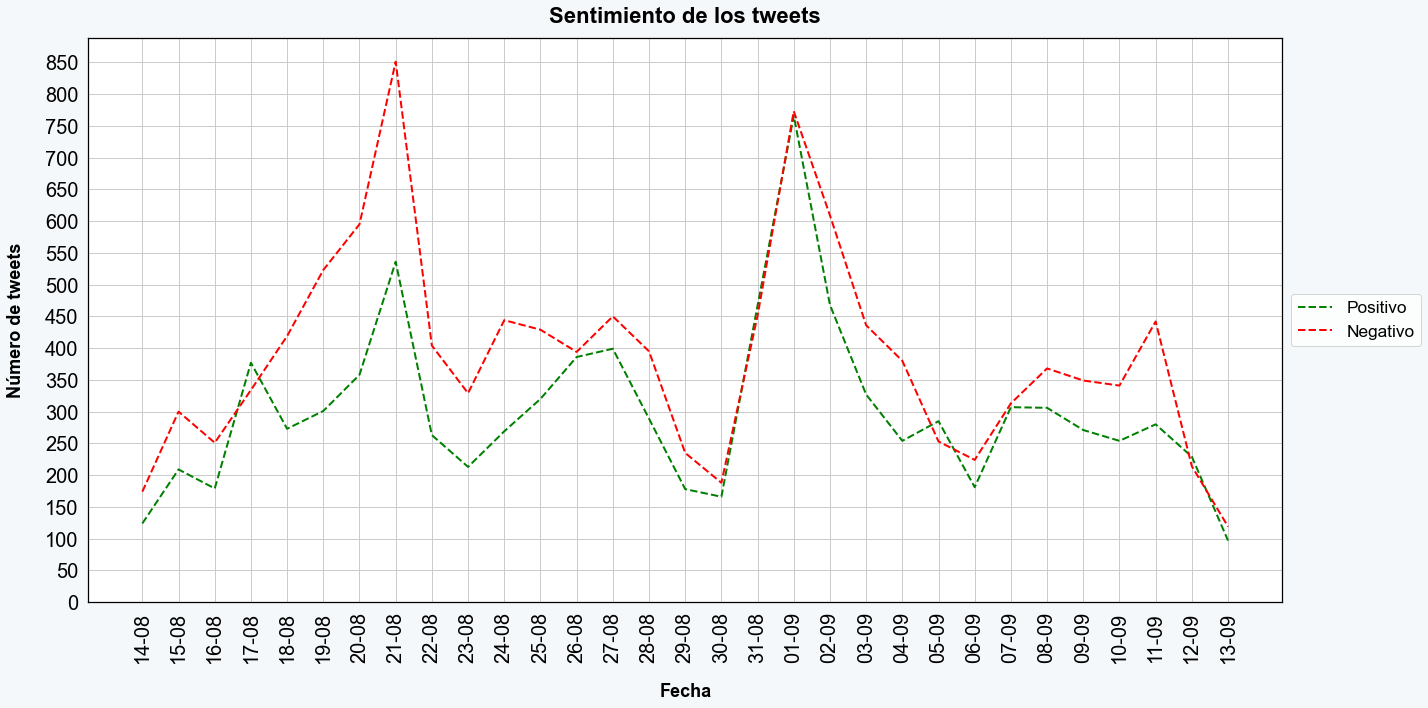

In [51]:
df_sent.xs("positivo",level=2).plot(lw=2,ls="--",color="green",figsize=(20,10),label="Positivo")
df_sent.xs("negativo",level=2).plot(lw=2,ls="--",color="red",figsize=(20,10),label="Negativo")
plt.xticks(ticks=np.arange(0, df_puntaje["fecha_str"].nunique()),labels=df_puntaje["fecha_str"].unique(),size=20,rotation=90)
plt.yticks(np.arange(0, 851 , 50),size=20)
plt.title("Sentimiento de los tweets",weight="bold",pad=15,size=22)
plt.xlabel("Fecha",weight="bold",labelpad=20,size=18)
plt.ylabel("Número de tweets",weight="bold",labelpad=20,size=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="x-large")
plt.tight_layout()

In [52]:
df_suma=df_puntaje.groupby(["mes","dia"])["puntaje"].sum()

In [53]:
def indice(x):
    if x>0:
        valor=x/df_suma.max()
    if x<0:
        valor=-(x/df_suma.min())
    return valor

In [54]:
df_indice=df_suma.apply(indice)

Text(0, 0.5, 'Índice')

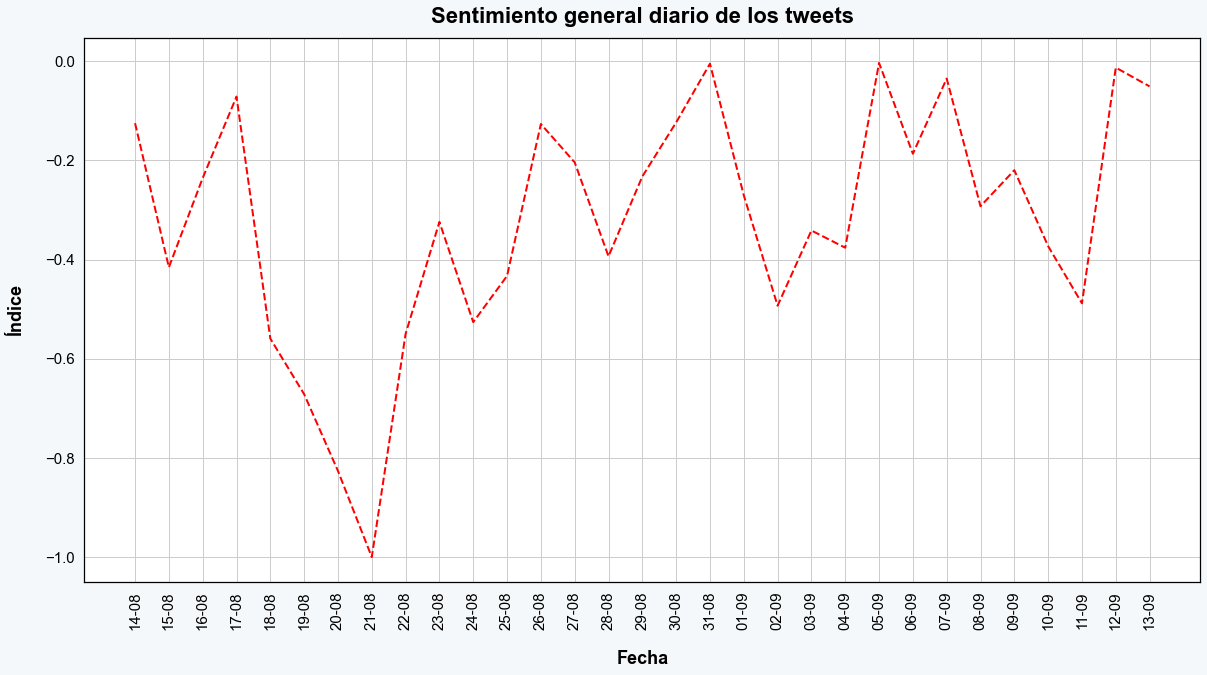

In [55]:
df_indice.plot(lw=2,ls="--",color="red",figsize=(20,10))
plt.xticks(ticks=np.arange(0, df_puntaje["fecha_str"].nunique()),labels=df_puntaje["fecha_str"].unique(),size=15,rotation=90)
plt.title("Sentimiento general diario de los tweets",weight="bold",pad=15,size=22)
plt.xlabel("Fecha",weight="bold",labelpad=20,size=18)
plt.yticks(size=15)
plt.ylabel("Índice",weight="bold",labelpad=20,size=18)